In [2]:
gx = function(xt){
    return(rnorm(1, mean=xt, sd=2))
}

fx = function(x){
    return(1/((1+(x^2)/5))^3)
}
# update function

update_fxn = function(xt){
    # propose y
    candidate = gx(xt)

    #decide to accept or not
    alpha = (fx(candidate)*dnorm(xt, mean=candidate, sd=2))/(fx(xt)*dnorm(candidate, mean=xt, sd=2))

    u = runif(1)
    y = (u<alpha)*candidate + (u>=alpha)*xt
    return(y)
}

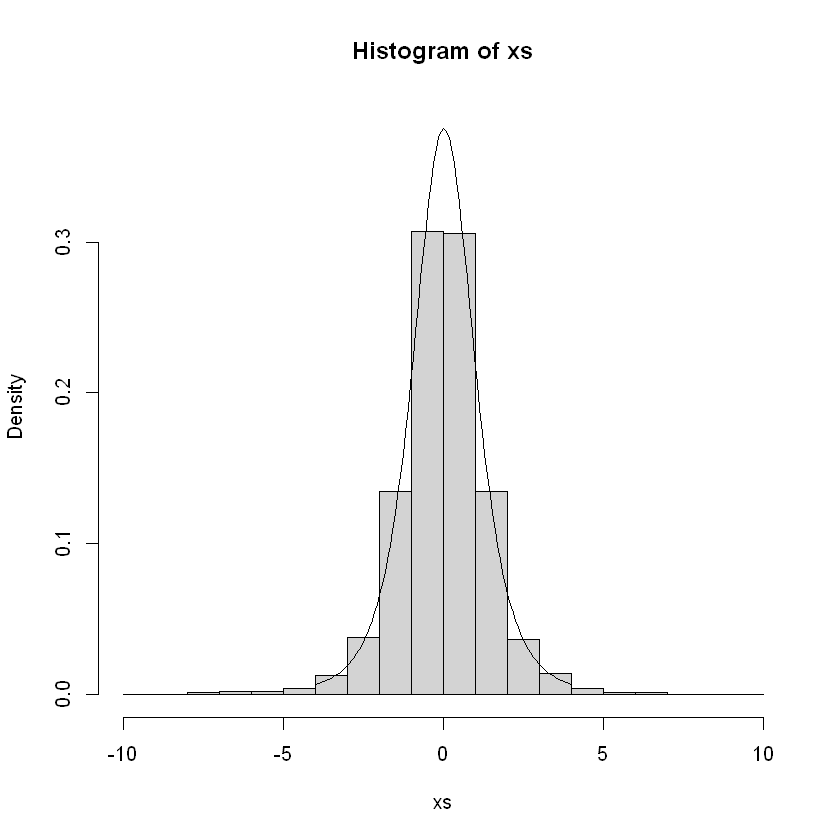

In [3]:
# initial state
x_0 = 1
burn_in = 1000
# burn in
x = x_0
for (i in 1:burn_in){
    x = update_fxn(x)
}
# actual sample
xs = c()
for (i in 1:(10*burn_in)){
    x = update_fxn(x)
    # save state
    xs[i] = x
}
hist(xs, prob=TRUE, ylim = c(0, 0.38))
curve(dt(x, df=4), from=-4, to=4, add=TRUE)